In [1]:
from __future__ import print_function, division # Make compatible with Python 2

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import sys
sys.path.append("../helpers")
from signal_modeling import gen_data, gen_trials

from ipywidgets import interact, interactive, fixed, FloatSlider
import ipywidgets as widgets

import scipy.optimize as optimization
   
import warnings
warnings.filterwarnings('ignore')

# Signal Modeling

The goal of signal modeling is to represent a collection of data using *model parameters*

Some example applications of signal modeling are *denoising*, *compression*, and *prediction*

Let's start with a basic class of models - *linear functions*

Imagine we have a collection of points, each with an $x$ value and a $y$ value.

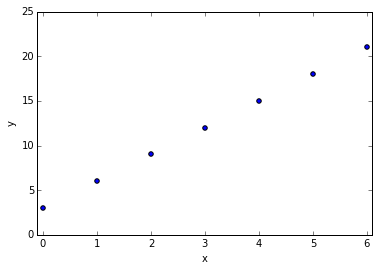

In [2]:
x_values = [0,1,2,3,4,5,6]
y_values = [3,6,9,12,15,18,21]
plt.scatter(x_values,y_values)
plt.xlabel('x'); plt.ylabel('y'); plt.xlim([-0.1,6.1]);

We see that these points can be more concisely represented with a linear function $y=ax + b$. Here we set $a=b=3$.

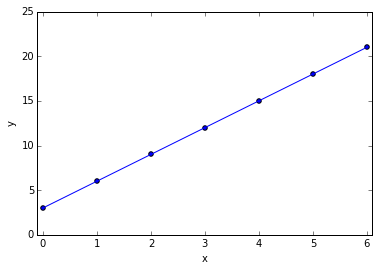

In [221]:
x_values = [0,1,2,3,4,5,6]; y_values = [3,6,9,12,15,18,21]
a = 3; b = 3; x = np.asarray(x_values)
plt.scatter(x_values,y_values); plt.plot(x,a*x+b) 
plt.xlabel('x'); plt.ylabel('y'); plt.xlim([-0.1,6.1]); plt.ylim([0,25]);

In this case, we can think of $y=ax+b$ as a *model*, with $a$ and $b$ as the *model parameters*. By choosing $a=b=3$, we are choosing the model parameters that best fit the model to the data.

Representing all the points on a line with the slope intercept form $y=ax+b$ is something we learn in algebra... How does this relate to *denoising*, *compression*, and *prediction*?

The use of signal modeling becomes much clearer when we introduce **uncertainty** into the problem.

Depending on the nature of the uncertainty, different modeling techniques will work better than others. Additionally, the nature of the uncertainty determines our *interpretation* of the model.

One common source of uncertainty is *random noise*. Let's look at the same signal with random noise.

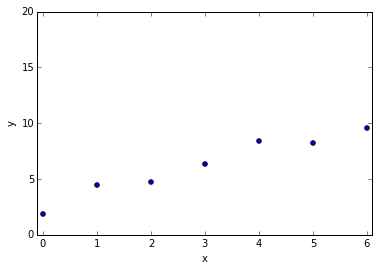

In [16]:
x = np.arange(0,7); a = np.random.randint(1,6); b = 3;
y = a*x + b + np.random.randn(7); plt.scatter(x,y);
plt.xlabel('x'); plt.ylabel('y'); plt.xlim([-0.1,6.1]); plt.ylim([0,20]);

Looking at the data, it appears roughly linear in $x$, i.e. $y\approx ax+b$. Then, we can to find the model parameters that *best fit* a linear function to our data. Let's look at 5 possibilities of $a$ and see which fits best.

True a is 2


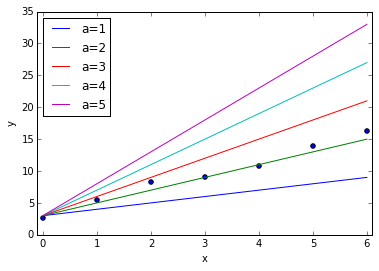

In [24]:
x = np.arange(0,7); a = np.random.randint(1,6); b = 3;
y = a*x + b + np.random.randn(7); plt.scatter(x,y)
for a_ in [1,2,3,4,5]:
        plt.plot(x,a_*x+b, label='a='+str(a_))
plt.legend(loc="nw"); plt.xlabel('x'); plt.ylabel('y'); plt.xlim([-0.1,6.1]);
print("True a is " + str(a))

If we believe that our *true* underlying signal was a linear function, then our signal model can be used to denoise the observed noisy signal. This is also called *signal recovery*.

While the model does not exactly fit the data, we are assuming that the discrepancies are the effect of undesired noise.

Signal modeling is not *always* used to denoise. As an example, let's conduct an experiment where we roll a die repeatedly and sum the numbers that appear.

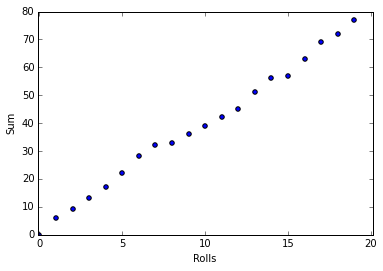

In [35]:
n = 20; x = np.arange(0,n+1); y = [0]
for i in range(n):
    y.append(y[i]+np.random.randint(1,7))
plt.scatter(x,y); plt.xlim([-0.1,n+0.1]); plt.ylim([-0.1,n*4]);
plt.xlabel('Rolls'); plt.ylabel('Sum');

Because we don't know what each roll is going to be, we would need to specify the outcome for each of the 20 rolls in order to convey this "signal" with complete accuracy.

But maybe we don't need to *exactly* represent the signal. We see that it looks roughly linear, so we can model it with a linear function. Since the sum starts at $0$ and increases by $3.5$ on average, we'll try the model parameters $a=3.5$ and $b=0$.

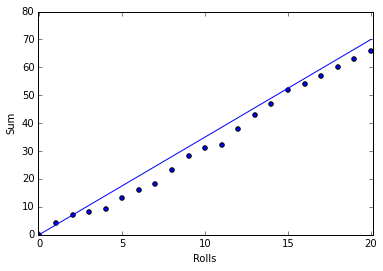

In [111]:
n = 20; x = np.arange(0,n+1); y = [0]
for i in range(n):
    y.append(y[i]+np.random.randint(1,7))
plt.scatter(x,y); plt.xlim([-0.1,n+0.1]); plt.ylim([-0.1,n*4]);
plt.plot(x,3.5*x); plt.xlabel('Rolls'); plt.ylabel('Sum');

In this sense, we can use our model for *compression*. Even though we won't capture the signal exactly, we only need to represent it with the two parameters $a$ and $b$. In real applications it is unlikely we will know the underlying structure of the signal as we do now and it will require more work to find a good model!

Now, let's see how we can use linear functions for *prediction*. Below I have (painstakingly) collected the height and shoe size of my friends and family. First let's look at the data:

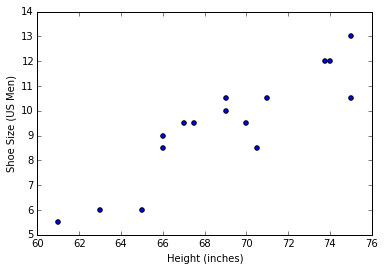

In [371]:
data_pairs = set([(66,9),(74,12),(73.75,12),(67.5,9.5),(75,13),(75,10.5),
                  (61,5.5),(63,6),(70,9.5),(71,10.5),(71,10.5),
                  (70.5,8.5),(69,10.5),(69,10),(65,6),(67,9.5),(66,8.5)])
height,size = zip(*data_pairs); plt.scatter(height,size);
plt.xlabel('Height (inches)'); plt.ylabel('Shoe Size (US Men)');

We see that the data looks roughly linear, so we'll model it with a linear function.

In order to fit the model to our data, we need to find an $a$ and $b$ such that $shoe \ size= a\cdot height + b$

The question now becomes *how* do we determine these model parameters?

We must find some *error* for each estimate of the model parameters. This error will measure how far our model is from exactly representing the data.

Once we have a way of measuring the error, we can find the parameters that minimize the error. These steps are not trivial and are examples of *optimization problems*.

Fortunately, Python has methods for solving for the optimal model parameters.

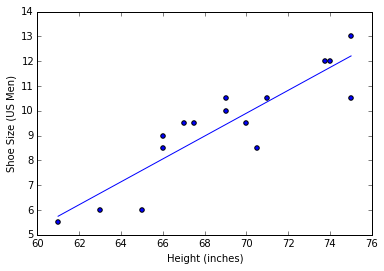

In [372]:
def linear_func(x,a,b):
    return a*x + b
[[a,b],err] = optimization.curve_fit(linear_func, height, size, [0,0], 1)
plt.scatter(height,size); plt.xlabel('Height (inches)'); plt.ylabel('Shoe Size (US Men)');
x = np.asarray([min(height),max(height)]); plt.plot(x,a*x+b);

Not bad! We see that our model does decently well at representing how shoe size and height are related.

So, how is this useful? We know that our measurements are all accurate (assuming my friends aren't liars), so why would we want this model that doesn't represent the data perfectly?

One reason is *prediction*. It is pretty intuitive that taller people will have a larger shoe size in general, but the exact nature of the relationship is not at all obvious. By creating a model, we are making that relationship exact, and we can use our model to infer shoesize from height:

In [ ]:
user_height = int(input("What is your height in inches? "))
print('Is your shoe size ' + str(a*user_height+b) + '?')

Not all data can be modeled accurately by linear functions. For example, look at the collection of points below and its corresponding best fit linear function.

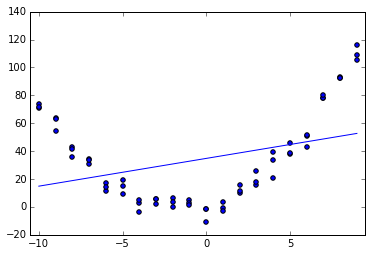

In [369]:
(xs,measurements,signal) = gen_trials(model='polynomial',model_params=[2,3,1],noise_param=5,N=3)
x = xs[0:len(signal)]; plt.scatter(xs,measurements)
[[a,b],err] = optimization.curve_fit(linear_func, xs, measurements, [0,0], 1)
x = np.asarray([min(xs),max(xs)]); plt.plot(x,a*x+b); plt.xlim([-10.5,9.5]);

As you may havve guessed, we can model this much more accurately with a quadratic model, where we find the optimal $a$, $b$, and $c$ for the model $y=ax^2+bx+c$.

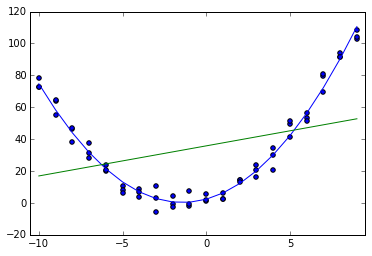

In [370]:
(xs,measurements,signal) = gen_trials(model='polynomial',model_params=[2,3,1],noise_param=5,N=3)
x = xs[0:len(signal)]; plt.scatter(xs,measurements)
def quadratic_func(x,a,b,c):
    return a*x*x + b*x + c 
[[a,b,c],err] = optimization.curve_fit(quadratic_func, xs, measurements, [0,0,0], 1)
plt.plot(np.asarray(x),c+b*np.asarray(x)+a*np.asarray(x)**2);
[[a,b],err] = optimization.curve_fit(linear_func, xs, measurements, [0,0], 1)
x = np.asarray([min(xs),max(xs)]); plt.plot(x,a*x+b); plt.xlim([-10.5,9.5]);

Can we use higher order polynomials as models? Are these always better?

While we can use higher order polynomials, they are not always better. Whenever we are working with models, it is important to think carefully about how we try to model signals.

Fact: You can always represent $n$ points with an order $n-1$ polynomial. But this introduces an issue known as *overfitting*. 

Let's try fitting a 10th order polynomial to our same height data, i.e. solving for the parameters in the model:
$$y=ax^9+bx^8+cx^7+dx^6+ex^5+fx^4+gx^3+hx^2+ix+j$$

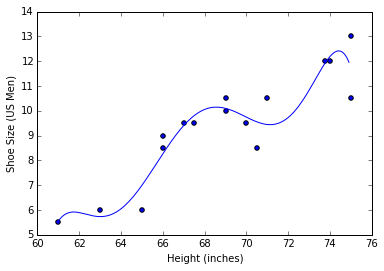

In [374]:
def big_poly(x,a,b,c,d,e,f,g,h,i,j):
    return a*(x**9)+b*(x**8)+c*(x**7)+d*(x**6)+e*(x**5)+f*(x**4)+g*(x**3)+h*(x**2)+i*x+j
[[a,b,c,d,e,f,g,h,i,j],err] = optimization.curve_fit(big_poly, height, size, [0,0,0,0,0,0,0,0,0,0], 1)
plt.scatter(height,size); plt.xlabel('Height (inches)'); plt.ylabel('Shoe Size (US Men)');
x = np.arange(min(height),max(height),0.1); 
plt.plot(x,a*(x**9)+b*(x**8)+c*(x**7)+d*(x**6)+e*(x**5)+f*(x**4)+g*(x**3)+h*(x**2)+i*x+j);

Notice that our model would guess that somebody who is 71 inches tall would have a *smaller* shoe size than someone that is 68 inches tall! In this case our model may have smaller error on our data set, but it may not accurately represent the *general* relationship between height and shoe size.

To further illustrate how important it is to give proper thought to model selection, we'll revisit our first example, where we perfectly fit a set of points to a line.

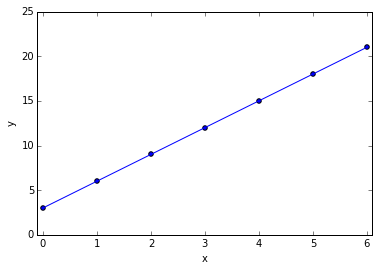

In [221]:
x_values = [0,1,2,3,4,5,6]; y_values = [3,6,9,12,15,18,21]
a = 3; b = 3; x = np.asarray(x_values)
plt.scatter(x_values,y_values); plt.plot(x,a*x+b) 
plt.xlabel('x'); plt.ylabel('y'); plt.xlim([-0.1,6.1]); plt.ylim([0,25]);

It is pretty safe to assume that if you ask anybody to fit those points to a model they would pick a line. Is this the only model that will fit the points?

Definitely not! Consider, for example, a sinusoid that has a linear offset:

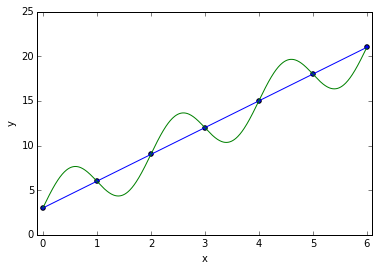

In [284]:
x_values = [0,1,2,3,4,5,6]; y_values = [3,6,9,12,15,18,21]
a = 3; b = 3; x = np.arange(0,6,0.01)
plt.scatter(x_values,y_values); plt.plot(x,a*x+b); plt.plot(x,a*x+b+3*np.sin(np.pi*x))
plt.xlabel('x'); plt.ylabel('y'); plt.xlim([-0.1,6.1]); plt.ylim([0,25]);

This is just one example of a model that perfectly fits these points. While the linear function seems like a *better* model, it really depends on the situation. The linear offset sinusoid certainly appears in far fewer (if any!) scenarios, but it is important to think carefully before choosing *any* model.